<a href="https://colab.research.google.com/github/VivianeSouza923/Python-Study/blob/main/An%C3%A1lise_da_Divis%C3%A3o_da_Popula%C3%A7%C3%A3o_por_Sexo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/Pesquisa Nacional por Amostra de Domicílios.csv - Pesquisa Nacional por Amostra de Domicílios.csv.csv')
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800.0,1.603.807.616
1,11,1,23,2,12,1150.0,1.739.789.827
2,11,1,35,8,15,880.0,1.760.443.822
3,11,0,46,2,6,3500.0,1.783.157.945
4,11,1,47,8,9,150.0,1.690.630.954
...,...,...,...,...,...,...,...
33178,31,0,60,4,12,8000.0,1.649.400.782
33179,31,0,33,8,15,2300.0,1.693.094.939
33180,31,1,31,8,12,2000.0,1.849.360.141
33181,31,1,52,2,9,4000.0,1.785.048.175


In [6]:


# para conhecer a base:
# imprime um resumo conciso do dataframe (a base)
# esse método imprime informações sobre o dataframe, incluíndo dtype e colunas do index, valores não nulos e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              33183 non-null  int64  
 1   Sexo            33183 non-null  int64  
 2   Idade           33183 non-null  int64  
 3   Cor             33183 non-null  int64  
 4   Anos de Estudo  33183 non-null  int64  
 5   Renda           33182 non-null  float64
 6   Altura          33182 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [7]:
# trocando os códigos pelos significados:
# acessando a coluna sexo do dataframe, eu vou alterar os valores 0 e 1 para masculino e feminino, respectivamente. O inplace=True serve para especificar que a modificação será feita no próprio dataframe, em vez de retornar uma cópia dele com a modificação.
df['Sexo'].replace({0:'Masculino', 1: 'Feminino'}, inplace=True)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,8,12,800.0,1.603.807.616
1,11,Feminino,23,2,12,1150.0,1.739.789.827
2,11,Feminino,35,8,15,880.0,1.760.443.822
3,11,Masculino,46,2,6,3500.0,1.783.157.945
4,11,Feminino,47,8,9,150.0,1.690.630.954
...,...,...,...,...,...,...,...
33178,31,Masculino,60,4,12,8000.0,1.649.400.782
33179,31,Masculino,33,8,15,2300.0,1.693.094.939
33180,31,Feminino,31,8,12,2000.0,1.849.360.141
33181,31,Feminino,52,2,9,4000.0,1.785.048.175


In [8]:
df['UF'].replace({
    11:'Rondônia',
    12:'Acre',
    13:'Amazonas',
    14:'Roraima',
    15:'Pará',
    16:'Amapá',
    17:'Tocatins',
    21:'Maranhão',
    22:'Piauí',
    23:'Ceará',
    24:'Rio Grande do Norte',
    25:'Paraíba',
    26:'Pernambuco',
    27:'Alagoas',
    28:'Sergipe',
    29:'Bahia',
    31:'Minas Gerais',
    32:'Espírito Santo',
    33:'Rio de Janeiro',
    35:'São Paulo',
    41:'Paraná',
    42:'Santa Catarina',
    43:'Rio Grande do Sul',
    50:'Mato Grosso do Sul',
    51:'Mato Grosso',
    52:'Goiás',
    53:'Distrito Federal'

}, inplace=True)

df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,8,12,800.0,1.603.807.616
1,Rondônia,Feminino,23,2,12,1150.0,1.739.789.827
2,Rondônia,Feminino,35,8,15,880.0,1.760.443.822
3,Rondônia,Masculino,46,2,6,3500.0,1.783.157.945
4,Rondônia,Feminino,47,8,9,150.0,1.690.630.954
...,...,...,...,...,...,...,...
33178,Minas Gerais,Masculino,60,4,12,8000.0,1.649.400.782
33179,Minas Gerais,Masculino,33,8,15,2300.0,1.693.094.939
33180,Minas Gerais,Feminino,31,8,12,2000.0,1.849.360.141
33181,Minas Gerais,Feminino,52,2,9,4000.0,1.785.048.175


In [9]:
anos_de_estudo = {
    1:'Sem instrução e menos de 1 ano',
    2:'1 ano',
    3:'2 anos',
    4:'3 anos',
    5:'4 anos',
    6:'5 anos',
    7:'6 anos',
    8:'7 anos',
    9:'8 anos',
    10:'9 anos',
    11:'10 anos',
    12:'11 anos',
    13:'12 anos',
    14:'13 anos',
    15:'14 anos',
    16:'15 anos ou mais',
    17:'Não determinados',

}

df['Anos de Estudo'].replace(anos_de_estudo, inplace=True)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,8,11 anos,800.0,1.603.807.616
1,Rondônia,Feminino,23,2,11 anos,1150.0,1.739.789.827
2,Rondônia,Feminino,35,8,14 anos,880.0,1.760.443.822
3,Rondônia,Masculino,46,2,5 anos,3500.0,1.783.157.945
4,Rondônia,Feminino,47,8,8 anos,150.0,1.690.630.954
...,...,...,...,...,...,...,...
33178,Minas Gerais,Masculino,60,4,11 anos,8000.0,1.649.400.782
33179,Minas Gerais,Masculino,33,8,14 anos,2300.0,1.693.094.939
33180,Minas Gerais,Feminino,31,8,11 anos,2000.0,1.849.360.141
33181,Minas Gerais,Feminino,52,2,8 anos,4000.0,1.785.048.175


In [10]:
cor = {
    0:'Indígena',
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda',
    9:'Sem declaração'
}

df['Cor'].replace(cor, inplace=True)
df


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800.0,1.603.807.616
1,Rondônia,Feminino,23,Branca,11 anos,1150.0,1.739.789.827
2,Rondônia,Feminino,35,Parda,14 anos,880.0,1.760.443.822
3,Rondônia,Masculino,46,Branca,5 anos,3500.0,1.783.157.945
4,Rondônia,Feminino,47,Parda,8 anos,150.0,1.690.630.954
...,...,...,...,...,...,...,...
33178,Minas Gerais,Masculino,60,Preta,11 anos,8000.0,1.649.400.782
33179,Minas Gerais,Masculino,33,Parda,14 anos,2300.0,1.693.094.939
33180,Minas Gerais,Feminino,31,Parda,11 anos,2000.0,1.849.360.141
33181,Minas Gerais,Feminino,52,Branca,8 anos,4000.0,1.785.048.175


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              33183 non-null  object 
 1   Sexo            33183 non-null  object 
 2   Idade           33183 non-null  int64  
 3   Cor             33183 non-null  object 
 4   Anos de Estudo  33183 non-null  object 
 5   Renda           33182 non-null  float64
 6   Altura          33182 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ MB


In [12]:
# Remover os pontos de separação de milhares e converter para números inteiros
df['Altura'] = df['Altura'].str.replace('.', '').astype(float).astype(pd.Int64Dtype())
print(df)

                 UF       Sexo  Idade     Cor                  Anos de Estudo  \
0          Rondônia  Masculino     23   Parda                         11 anos   
1          Rondônia   Feminino     23  Branca                         11 anos   
2          Rondônia   Feminino     35   Parda                         14 anos   
3          Rondônia  Masculino     46  Branca                          5 anos   
4          Rondônia   Feminino     47   Parda                          8 anos   
...             ...        ...    ...     ...                             ...   
33178  Minas Gerais  Masculino     60   Preta                         11 anos   
33179  Minas Gerais  Masculino     33   Parda                         14 anos   
33180  Minas Gerais   Feminino     31   Parda                         11 anos   
33181  Minas Gerais   Feminino     52  Branca                          8 anos   
33182  Minas Gerais  Masculino     36   Parda  Sem instrução e menos de 1 ano   

        Renda      Altura  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              33183 non-null  object 
 1   Sexo            33183 non-null  object 
 2   Idade           33183 non-null  int64  
 3   Cor             33183 non-null  object 
 4   Anos de Estudo  33183 non-null  object 
 5   Renda           33182 non-null  float64
 6   Altura          33182 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [14]:
# frequencia absoluta de sexo:

frequencia_absoluta_sexo = df['Sexo'].value_counts()
frequencia_absoluta_sexo

Sexo
Masculino    22847
Feminino     10336
Name: count, dtype: int64

<Axes: title={'center': 'Frequencia Absoluta de Sexo'}, xlabel='Sexo', ylabel='Frequencia Absoluta'>

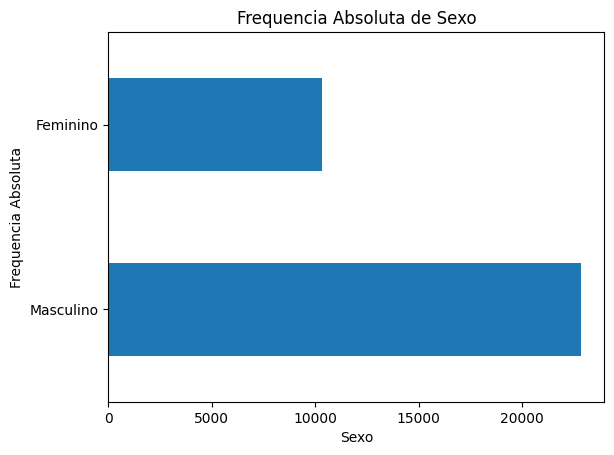

In [17]:
# plotar a frequencia absoluta de sexo:

frequencia_absoluta_sexo.plot(kind='barh', title='Frequencia Absoluta de Sexo', xlabel='Sexo', ylabel='Frequencia Absoluta')
# esse 'barh' quer dizer que o plot será na horizontal

<Axes: title={'center': 'Frequencia Absoluta de Sexo'}, xlabel='Sexo', ylabel='Frequencia Absoluta'>

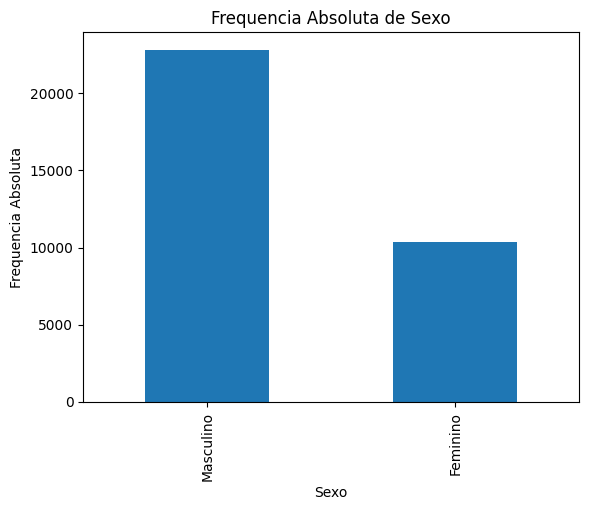

In [18]:
# esse plot com o kind='bar' vai plotar na vertical.

frequencia_absoluta_sexo.plot(kind='bar', title='Frequencia Absoluta de Sexo', xlabel='Sexo', ylabel='Frequencia Absoluta')

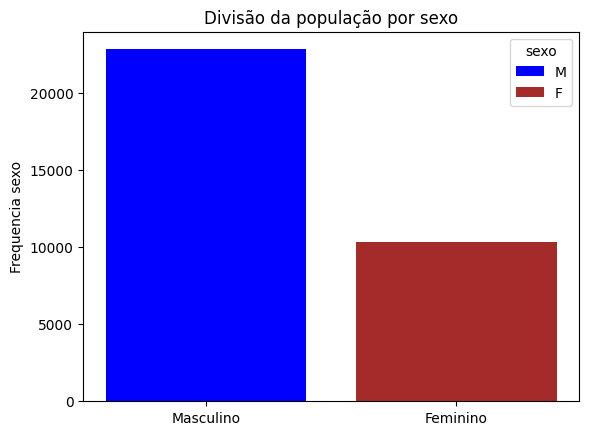

In [22]:
# criar figura e eixo
# figura, eixo = plt.subplots()
fig, ax = plt.subplots()

# dados para o gráfico de barras:
sexo = ['Masculino', 'Feminino'] # categorias de sexo
counts = [frequencia_absoluta_sexo[0], frequencia_absoluta_sexo[1]] # frequência absoluta de cada categoria
bar_labels = ['M', 'F'] # rótulos para as barras
bar_colors = ['blue', 'brown'] # cor das barras

# plotar o gráfico de barras no eixo (subplot)
ax.bar(sexo, counts, label=bar_labels, color=bar_colors)
# configurar o rótulo do eixo y (eixo das frequências)
ax.set_ylabel('Frequencia sexo')
# configurar título do gráfico
ax.set_title('Divisão da população por sexo')
#adicionar legenda ao gráfico
ax.legend(title='sexo')
# exibir o gráfico
plt.show()

